In [378]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC, SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

SEED = 5
np.random.seed(SEED)

In [379]:
change = {
    "male": 0,
    "female": 1
}

train_df = pd.read_csv("titanic_challenge/train.csv")

train_df["Sex"] = train_df["Sex"].map(change)
train_df["Age"] = train_df["Age"].fillna(0)
train_df["Fare"] = train_df["Fare"].fillna(0)

train_df_x = train_df[["PassengerId", "Sex", "Age", "Pclass", "SibSp", "Parch"]]
train_df_y = train_df["Survived"]

raw_train_x, raw_test_x, train_y, test_y = train_test_split(train_df_x, train_df_y, stratify=train_df_y, test_size=0.25)

print(f"Training with {len(raw_train_x)} and testing with {len(raw_test_x)}")

Training with 668 and testing with 223


In [380]:
# Baseline
baseline_train_predict = np.zeros(668)
baseline_accuracy = accuracy_score(train_y, baseline_train_predict)
print(f"Baseline accuracy was {baseline_accuracy:.2%}")

# Model training
scaler = StandardScaler()
scaler.fit(raw_train_x)
train_x = scaler.transform(raw_train_x)
test_x = scaler.transform(raw_test_x)

model = SVC()
model.fit(train_x, train_y)
predict = model.predict(test_x)
accuracy = accuracy_score(test_y, predict)
print(f"Accuracy was {accuracy:.2%}")

Baseline accuracy was 61.68%
Accuracy was 83.41%


In [331]:
frames = [pd.DataFrame(test_y), raw_test_x]
new_df = pd.concat(frames, axis=1)

change_survived = {
    0: "No",
    1: "Yes"
}

change_sex = {
    0: "male",
    1: "female"
}

change_class = {
    1: "First",
    2: "Second",
    3: "Third"
}

new_df["Survived"] = new_df["Survived"].map(change_survived)
new_df["Sex"] = new_df["Sex"].map(change_sex)
new_df["Pclass"] = new_df["Pclass"].map(change_class)

# Percentage to survive

In [ ]:
childrens_alive = [(int(age), sex) for sex, age, alive in zip(new_df["Sex"],new_df["Age"], new_df["Survived"]) if age > 1 and age < 13 and alive == "Yes"]
childrens_dead = [(int(age), sex) for sex, age, alive in zip(new_df["Sex"],new_df["Age"], new_df["Survived"]) if age > 1 and age < 13 and alive == "No"]

teenagers_alive = [(int(age), sex) for sex, age, alive in zip(new_df["Sex"],new_df["Age"], new_df["Survived"]) if age > 13 and age < 20 and alive == "Yes"] 
teenagers_dead = [(int(age), sex) for sex, age, alive in zip(new_df["Sex"],new_df["Age"], new_df["Survived"]) if age > 13 and age < 20 and alive == "No"] 

adults_alive = [(int(age), sex) for sex, age, alive in zip(new_df["Sex"],new_df["Age"], new_df["Survived"]) if age > 20 and age < 60 and alive == "Yes"] 
adults_dead = [(int(age), sex) for sex, age, alive in zip(new_df["Sex"],new_df["Age"], new_df["Survived"]) if age > 20 and age < 60 and alive == "No"] 

old_alive = [(int(age), sex) for sex, age, alive in zip(new_df["Sex"],new_df["Age"], new_df["Survived"]) if age > 60 and alive == "Yes"] 
old_dead = [(int(age), sex) for sex, age, alive in zip(new_df["Sex"],new_df["Age"], new_df["Survived"]) if age > 60 and alive == "No"] 

In [ ]:
percent_children = round((len(childrens_alive)/len(childrens_dead)) * 100, 2)
percent_teenager = round((len(teenagers_alive)/len(teenagers_dead)) * 100, 2)
percent_adult = round((len(adults_alive)/len(adults_dead)) * 100, 2)
percent_old = round((len(old_alive)/len(old_dead)) * 100, 2)

df_percentual_to_survive = pd.DataFrame([("Children", percent_children), ("Teenager", percent_teenager), ("Adult", percent_adult), ("Old", percent_old)], columns=["Type", "Percentage"])

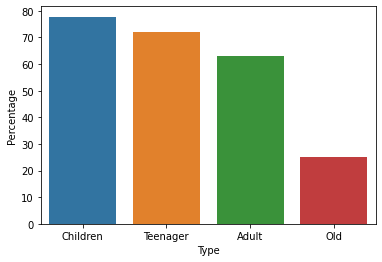

In [413]:
sns.barplot(data=df_percentual_to_survive, x="Type", y="Percentage")

We can say that survived more people in the **Third Class**, but it was where died most too. **First Class** was the only one that has more survivors.

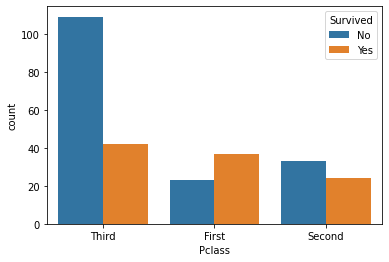

In [323]:
sns.countplot(data=new_df, x="Pclass", hue="Survived")

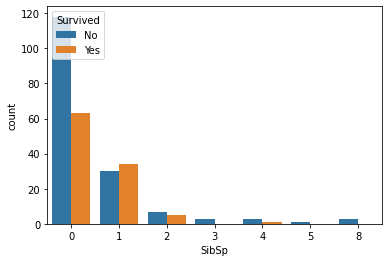

In [324]:
sns.countplot(data=new_df, x="SibSp", hue="Survived")

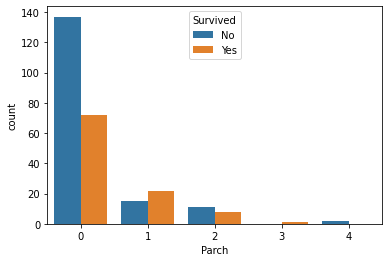

In [325]:
sns.countplot(data=new_df, x="Parch", hue="Survived")

We can affirm that **Third Class** has young people than others, while **Second Class** has more female between 20 - 40 years old. **First Class** has more female from younger to older.

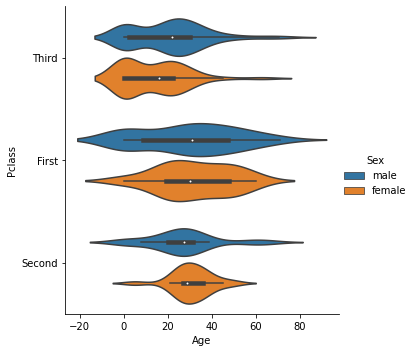

In [326]:
sns.catplot(data=new_df, x="Age", y="Pclass", hue="Sex",  kind="violin")